In [2]:
# TIMESEERIES DATA
#VISUALIZING TS
#EXPONENTIAL SMOOTHING
#HOLT's MODEL
#HOLT's WINTER MODEL
#ARIMA

In [4]:
# TS ANALYSIS
# WHITE NOISE
# Python implementation
# Feature Engineering TS data

# ARCH / GARCH

In [7]:
import numpy as np

import pandas as pd

import statsmodels.api as sm

import matplotlib.pyplot as plt

%matplotlib inline

#from pandas.core import datetools

df = pd.read_csv("C:\\Users\\radha\\Desktop\\dsp27 Class\\monthly_milk.csv")

df.head()

,month,milk_prod_per_cow_kg
0,1/1/1962,265.05
1,2/1/1962,252.45
2,3/1/1962,288.00
3,4/1/1962,295.20
4,5/1/1962,327.15


In [8]:
df.tail()

,month,milk_prod_per_cow_kg
163,8/1/1975,386.10
164,9/1/1975,367.65
165,10/1/1975,372.15
166,11/1/1975,358.65
167,12/1/1975,379.35


In [9]:
df['month'] = pd.to_datetime(df['month'])
df.head()

,month,milk_prod_per_cow_kg
0,1962-01-01,265.05
1,1962-02-01,252.45
2,1962-03-01,288.00
3,1962-04-01,295.20
4,1962-05-01,327.15


In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
milk_prod_per_cow_kg,168.0,339.61875,45.992036,248.85,304.9875,342.45,371.025,436.05


<AxesSubplot:xlabel='month'>

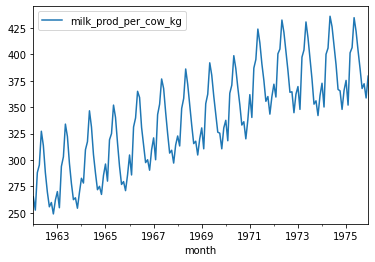

In [11]:
df.set_index('month',inplace=True)
df.plot()
# other df is an issue , observe

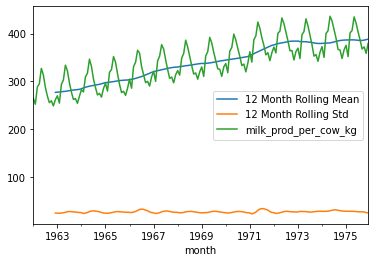

In [12]:
timeseries = df['milk_prod_per_cow_kg']
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')
timeseries.rolling(12).std().plot(label='12 Month Rolling Std')
timeseries.plot()

plt.legend()

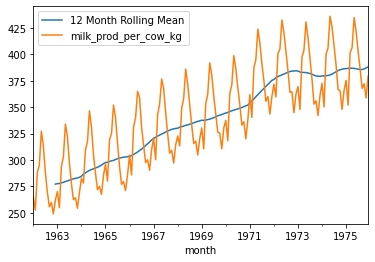

In [13]:
timeseries.rolling(12).mean().plot(label= '12 Month Rolling Mean')
timeseries.plot()

plt.legend()

<Figure size 432x288 with 0 Axes>

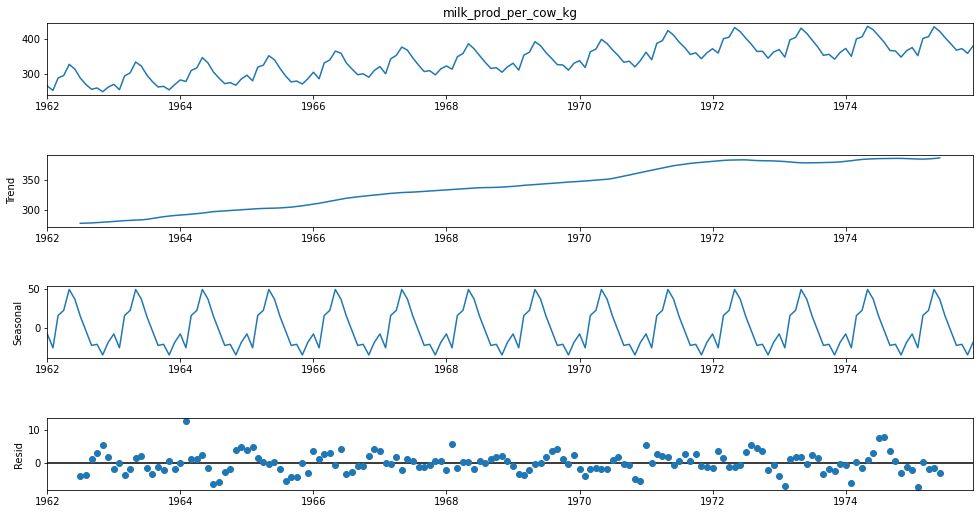

In [15]:
#Decomposition

#ETS decomposition allows us to see the individual parts!

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['milk_prod_per_cow_kg'], period=12)
fig = plt.figure()

fig = decomposition.plot()

fig.set_size_inches(15, 8)

Testing for Stationarity We can use the Augmented Dickey-Fuller unit root test. In statistics and econometrics, an augmented Dickey—Fuller test (ADF) tests the null hypothesis that a unit root is present in a time series sample. The alternative hypothesis is different depending on which version of the test is used, but is usually stationarity or trend-stationarity. Basically, we are trying to whether to accept the Null Hypothesis HO (that the time series has a unit root, indicating it is non-stationary) or reject HO and go with the Alternative Hypothesis (that the time series has no unit root and is stationary). We end up deciding this based on the p-value return.

« A small p-value (typically < 0.05) indicates strong evidence against the null hypothesis, so you reject the null

hypothesis.

« Alarge p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.

Let's run the Augmented Dickey-Fuller test on our data:

In [16]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['milk_prod_per_cow_kg'])
print( "Augmented Dickey-Fuller Test:")
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
for value,label in zip(result,labels):
    print(label+' : '+str(value) )
      
if result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.3038115874221319
p-value : 0.6274267086030305
#Lags Used : 13
Number of Observations Used : 154
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [17]:
# Store in a function for later use!
def adf_check(time_series):
    #Pass in a time series, returns ADF report
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result, labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
          print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
          print("weak evidence against null hypothesis, time series has a wnit root. indicating it is non-stationary")

important Note!

We have now realized that our data is seasonal (it is also pretty obvious from the plot itself). This means we need to use Seasonal ARIMA on our model. If our data was not seasonal, it means we could use just ARIMA on it. We will take this into account when differencing our data!

Diiferencing

The first difference of a time series is the series of changes from one period to the next. We can do this easily with pandas. You can continue to take the second difference, third difference, and so on until your data is stationary.

Augmented Dickey-Fuller Test:
ADF Test Statistic : -3.0549955586530344
p-value : 0.030068004001788568
#Lags Used : 14
Number of Observations Used : 152
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='month'>

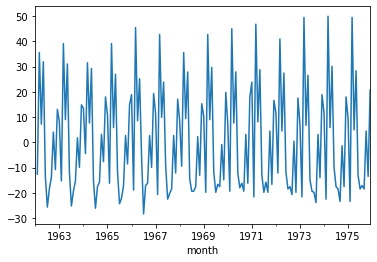

In [18]:
df['Milk First Difference'] = df['milk_prod_per_cow_kg'] - df['milk_prod_per_cow_kg'].shift(1)
# adf_check function
adf_check(df['Milk First Difference'].dropna())

##strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary
df['Milk First Difference'].plot()

<AxesSubplot:xlabel='month'>

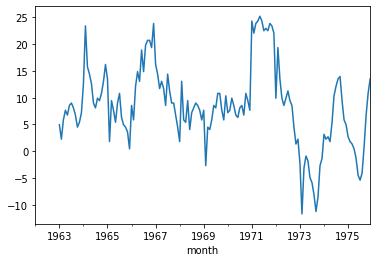

In [19]:
#seasonal Difference

df['Seasonal Difference'] = df['milk_prod_per_cow_kg'] - df['milk_prod_per_cow_kg'].shift(12)
df['Seasonal Difference'].plot()

In [20]:
# Seasonal Difference by itself was not enough!

adf_check(df[ 'Seasonal Difference' ].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.3354193143594046
p-value : 0.16079880527711138
#Lags Used : 12
Number of Observations Used : 143
weak evidence against null hypothesis, time series has a wnit root. indicating it is non-stationary



Autocorrelation and Partial Autocorrelation Plots An autocorrelation plot (also known as a Correlogram ) shows the correlation of the series with itself, lagged by x time units. So the y axis is the correlation and the x axis is the number of time units of lag.

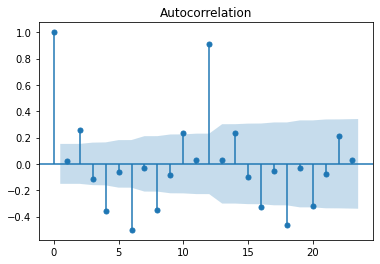

In [21]:
#interpreting ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# Duplicate plots

# Check out: https://stackoverflow.com/questions/21788593/statsmodels-duplicate-charts
# https://github.com/statsmodels/statsmodels/issues/1265

fig_first = plot_acf(df["Milk First Difference" ].dropna())

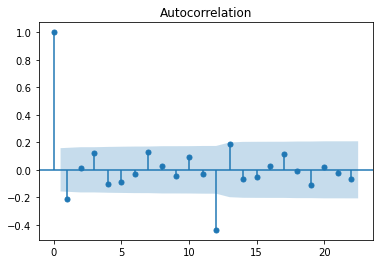

In [23]:
df['Seasonal First Difference'] = df['Milk First Difference'] - df['Milk First Difference'].shift(12)
#df['Seasonal First Difference'].plot()
fig_seasonal_first = plot_acf(df['Seasonal First Difference'].dropna())

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

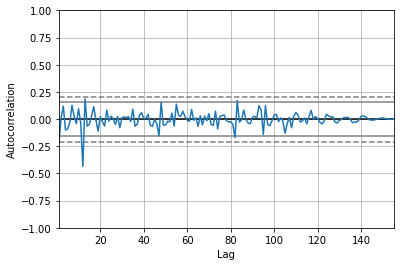

In [24]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Seasonal First Difference'].dropna())

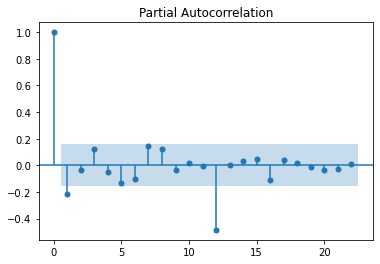

In [25]:
fig_seasonal_first2 = plot_pacf(df['Seasonal First Difference'].dropna())


Interpretation Typically a sharp drop after lag "k" suggests an AR-k model should be used. If there is a gradual decline, it suggests an MA model.

Final Thoughts on Autocorrelation and Partial Autocorrelation Identification of an AR model is often best done with the PACF. For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor. Identification of an MA model is often best done with the ACF rather than the PACF. For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.

In [26]:
############  ARIMA

In [27]:
from statsmodels.tsa.arima_model import ARIMA
#help(ARIMA)
# We have seasonal data:
model = sm.tsa.statespace.SARIMAX(df['milk_prod_per_cow_kg'],order=(0,1,0), seasonal_order=(1,1,1,12))
results = model. fit()
print(results.summary()) 

#p,d,q parameters p: The number of lag observations included in the model. d: 
#The number of times that the raw observations are differenced, also called the degree of differencing. q: 
#The size of the moving average window, also called the order of moving average

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                      SARIMAX Results                                       
Dep. Variable:                 milk_prod_per_cow_kg   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -410.300
Date:                              Tue, 28 Sep 2021   AIC                            826.599
Time:                                      15:23:25   BIC                            835.730
Sample:                                  01-01-1962   HQIC                           830.308
                                       - 12-01-1975                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.58

<AxesSubplot:xlabel='month'>

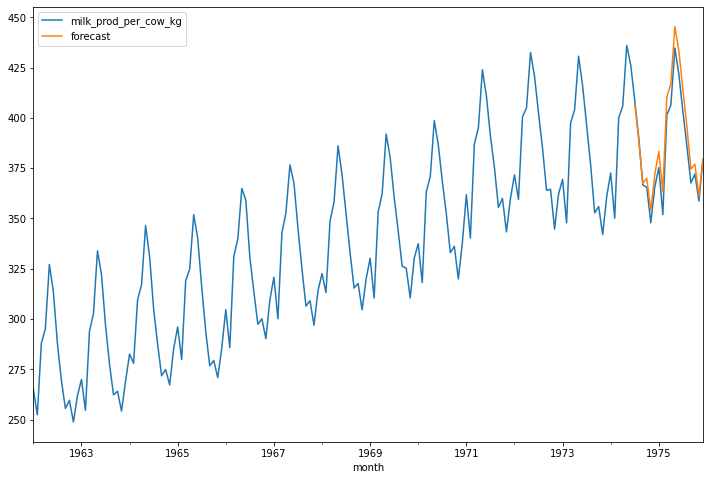

In [28]:
#Prediction of Future Values

#Firts we can get an idea of how well our model performs by just predicting for values that we actually already know
df['forecast'] = results.predict(start = 150, end= 168, dynamic= True)

df[['milk_prod_per_cow_kg','forecast']].plot(figsize=(12,8))

In [29]:
df.tail()

,milk_prod_per_cow_kg,Milk First Difference,Seasonal Difference,Seasonal First Difference,forecast
month,,,,,
1975-08-01,386.10,-17.10,-4.05,1.35,395.851192
1975-09-01,367.65,-18.45,0.90,4.95,374.547960
1975-10-01,372.15,4.50,6.75,5.85,376.975138
1975-11-01,358.65,-13.50,10.80,4.05,361.103900
1975-12-01,379.35,20.70,13.50,2.70,379.125127


In [31]:
from pandas.tseries.offsets import DateOffset
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(0,24) ]
future_dates

[Timestamp('1975-12-01 00:00:00'),
 Timestamp('1976-01-01 00:00:00'),
 Timestamp('1976-02-01 00:00:00'),
 Timestamp('1976-03-01 00:00:00'),
 Timestamp('1976-04-01 00:00:00'),
 Timestamp('1976-05-01 00:00:00'),
 Timestamp('1976-06-01 00:00:00'),
 Timestamp('1976-07-01 00:00:00'),
 Timestamp('1976-08-01 00:00:00'),
 Timestamp('1976-09-01 00:00:00'),
 Timestamp('1976-10-01 00:00:00'),
 Timestamp('1976-11-01 00:00:00'),
 Timestamp('1976-12-01 00:00:00'),
 Timestamp('1977-01-01 00:00:00'),
 Timestamp('1977-02-01 00:00:00'),
 Timestamp('1977-03-01 00:00:00'),
 Timestamp('1977-04-01 00:00:00'),
 Timestamp('1977-05-01 00:00:00'),
 Timestamp('1977-06-01 00:00:00'),
 Timestamp('1977-07-01 00:00:00'),
 Timestamp('1977-08-01 00:00:00'),
 Timestamp('1977-09-01 00:00:00'),
 Timestamp('1977-10-01 00:00:00'),
 Timestamp('1977-11-01 00:00:00')]

In [32]:
future_dates_df = pd.DataFrame( index=future_dates[1:],columns=df.columns)
future_df = pd.concat([df,future_dates_df])
future_df.tail()

,milk_prod_per_cow_kg,Milk First Difference,Seasonal Difference,Seasonal First Difference,forecast
1977-07-01,NaN,NaN,NaN,NaN,NaN
1977-08-01,NaN,NaN,NaN,NaN,NaN
1977-09-01,NaN,NaN,NaN,NaN,NaN
1977-10-01,NaN,NaN,NaN,NaN,NaN
1977-11-01,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

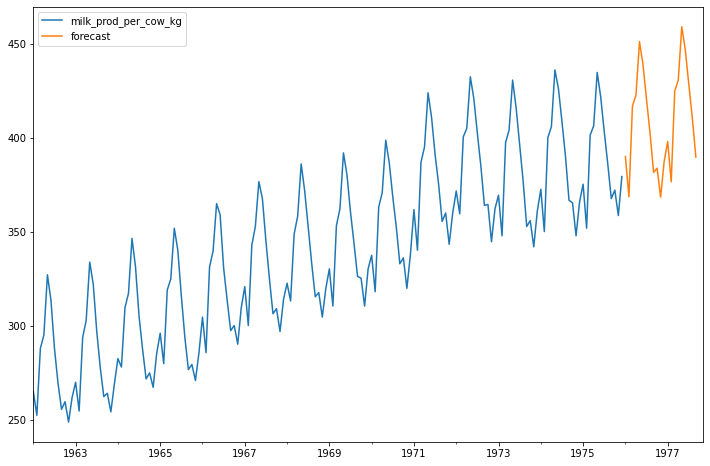

In [33]:
future_df['forecast'] = results.predict(start = 168, end = 188, dynamic= True)
future_df[['milk_prod_per_cow_kg', 'forecast']].plot(figsize=(12, 8))

In [34]:
future_df.tail()

,milk_prod_per_cow_kg,Milk First Difference,Seasonal Difference,Seasonal First Difference,forecast
1977-07-01,NaN,NaN,NaN,NaN,428.186889
1977-08-01,NaN,NaN,NaN,NaN,410.363794
1977-09-01,NaN,NaN,NaN,NaN,389.646843
1977-10-01,NaN,NaN,NaN,NaN,NaN
1977-11-01,NaN,NaN,NaN,NaN,NaN


In [35]:
# HOLT's MODEL

In [36]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt


In [37]:
%matplotlib inline

data = [
    446.6565,
    454.4733,
    455.663,
    423.6322,
    456.2713,
    440.5881,
    425.3325,
    485.1494,
    506.0482,
    526.792,
    514.2689,
    494.211,
]
index = pd.date_range(start="1996", end="2008", freq="A")
oildata = pd.Series(data, index)

data = [
    17.5534,
    21.86,
    23.8866,
    26.9293,
    26.8885,
    28.8314,
    30.0751,
    30.9535,
    30.1857,
    31.5797,
    32.5776,
    33.4774,
    39.0216,
    41.3864,
    41.5966,
]
index = pd.date_range(start="1990", end="2005", freq="A")
air = pd.Series(data, index)

data = [
    263.9177,
    268.3072,
    260.6626,
    266.6394,
    277.5158,
    283.834,
    290.309,
    292.4742,
    300.8307,
    309.2867,
    318.3311,
    329.3724,
    338.884,
    339.2441,
    328.6006,
    314.2554,
    314.4597,
    321.4138,
    329.7893,
    346.3852,
    352.2979,
    348.3705,
    417.5629,
    417.1236,
    417.7495,
    412.2339,
    411.9468,
    394.6971,
    401.4993,
    408.2705,
    414.2428,
]
index = pd.date_range(start="1970", end="2001", freq="A")
livestock2 = pd.Series(data, index)

data = [407.9979, 403.4608, 413.8249, 428.105, 445.3387, 452.9942, 455.7402]
index = pd.date_range(start="2001", end="2008", freq="A")
livestock3 = pd.Series(data, index)

data = [
    41.7275,
    24.0418,
    32.3281,
    37.3287,
    46.2132,
    29.3463,
    36.4829,
    42.9777,
    48.9015,
    31.1802,
    37.7179,
    40.4202,
    51.2069,
    31.8872,
    40.9783,
    43.7725,
    55.5586,
    33.8509,
    42.0764,
    45.6423,
    59.7668,
    35.1919,
    44.3197,
    47.9137,
]
index = pd.date_range(start="2005", end="2010-Q4", freq="QS-OCT")
aust = pd.Series(data, index)


Figure 7.1: Oil production in Saudi Arabia from 1996 to 2007.


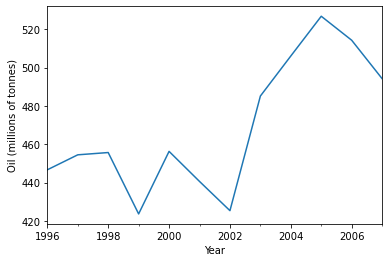

In [38]:
# Simple Exponential Smoothing
ax = oildata.plot()
ax.set_xlabel("Year")
ax.set_ylabel("Oil (millions of tonnes)")
print("Figure 7.1: Oil production in Saudi Arabia from 1996 to 2007.")

In [44]:
aust

1996-12-31    446.6565
1997-12-31    454.4733
1998-12-31    455.6630
1999-12-31    423.6322
2000-12-31    456.2713
2001-12-31    440.5881
2002-12-31    425.3325
2003-12-31    485.1494
2004-12-31    506.0482
2005-12-31    526.7920
2006-12-31    514.2689
2007-12-31    494.2110
Freq: A-DEC, dtype: float64

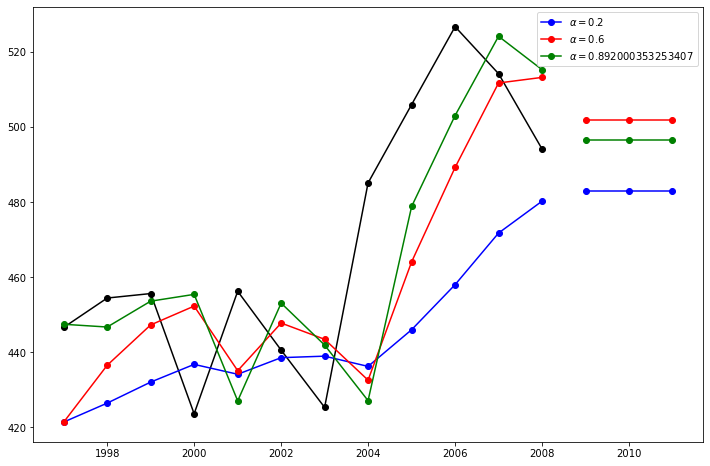

In [39]:
fit1 = SimpleExpSmoothing(oildata, initialization_method="heuristic").fit(
    smoothing_level=0.2, optimized=False
)
fcast1 = fit1.forecast(3).rename(r"$\alpha=0.2$")
fit2 = SimpleExpSmoothing(oildata, initialization_method="heuristic").fit(
    smoothing_level=0.6, optimized=False
)
fcast2 = fit2.forecast(3).rename(r"$\alpha=0.6$")
fit3 = SimpleExpSmoothing(oildata, initialization_method="estimated").fit()
fcast3 = fit3.forecast(3).rename(r"$\alpha=%s$" % fit3.model.params["smoothing_level"])

plt.figure(figsize=(12, 8))
plt.plot(oildata, marker="o", color="black")
plt.plot(fit1.fittedvalues, marker="o", color="blue")
(line1,) = plt.plot(fcast1, marker="o", color="blue")
plt.plot(fit2.fittedvalues, marker="o", color="red")
(line2,) = plt.plot(fcast2, marker="o", color="red")
plt.plot(fit3.fittedvalues, marker="o", color="green")
(line3,) = plt.plot(fcast3, marker="o", color="green")
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])

Here we run three variants of simple exponential smoothing: 1. In fit1 we do not use the auto optimization but instead choose to explicitly provide the model with the  parameter 2. In fit2 as above we choose an  3. In fit3 we allow statsmodels to automatically find an optimized  value for us. This is the recommended approach.

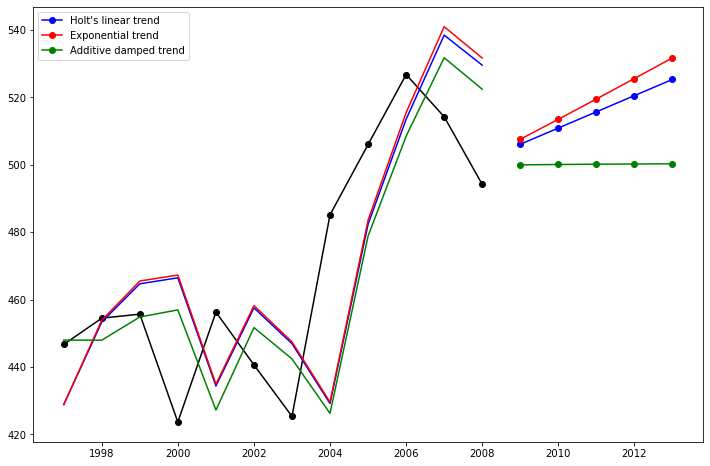

In [40]:
#air, oildata
fit1 = Holt(oildata, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2, optimized=False
)
fcast1 = fit1.forecast(5).rename("Holt's linear trend")
fit2 = Holt(oildata, exponential=True, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2, optimized=False
)
fcast2 = fit2.forecast(5).rename("Exponential trend")
fit3 = Holt(oildata, damped_trend=True, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2
)
fcast3 = fit3.forecast(5).rename("Additive damped trend")

plt.figure(figsize=(12, 8))
plt.plot(oildata, marker="o", color="black")
plt.plot(fit1.fittedvalues, color="blue")
(line1,) = plt.plot(fcast1, marker="o", color="blue")
plt.plot(fit2.fittedvalues, color="red")
(line2,) = plt.plot(fcast2, marker="o", color="red")
plt.plot(fit3.fittedvalues, color="green")
(line3,) = plt.plot(fcast3, marker="o", color="green")
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])


In [45]:
# Holt’s Winters Seasonal
aust

1996-12-31    446.6565
1997-12-31    454.4733
1998-12-31    455.6630
1999-12-31    423.6322
2000-12-31    456.2713
2001-12-31    440.5881
2002-12-31    425.3325
2003-12-31    485.1494
2004-12-31    506.0482
2005-12-31    526.7920
2006-12-31    514.2689
2007-12-31    494.2110
Freq: A-DEC, dtype: float64

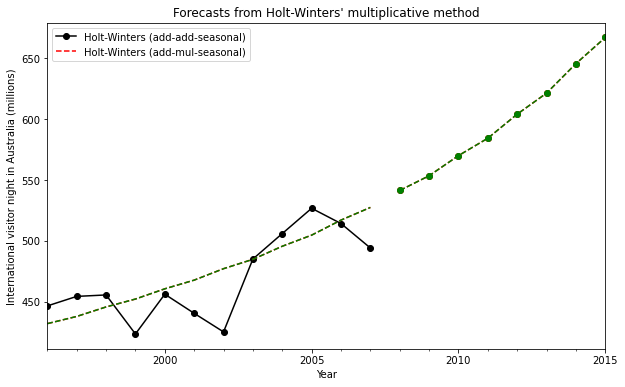

Figure 7.6: Forecasting international visitor nights in Australia using Holt-Winters method with both additive and multiplicative seasonality.


,Additive,Multiplicative,Additive Dam,Multiplica Dam
$\alpha$,5.000000e-03,5.000000e-03,5.000000e-03,5.000000e-03
$\beta$,1.000000e-04,1.000000e-04,1.000000e-04,1.000000e-04
$\phi$,NaN,NaN,9.900000e-01,9.900000e-01
$\gamma$,1.000000e-04,1.000000e-04,1.000000e-04,1.000000e-04
$l_0$,4.595369e-01,4.595369e-01,4.595369e-01,4.595369e-01
$b_0$,2.742830e-08,2.742830e-08,2.742830e-08,2.742830e-08
SSE,6.564041e+03,6.564041e+03,6.093273e+03,6.093273e+03


In [46]:

fit1 = ExponentialSmoothing(
    aust,
    seasonal_periods=2,
    trend="add",
    seasonal="add",
    use_boxcox=True,
    initialization_method="estimated",
).fit()
fit2 = ExponentialSmoothing(
    aust,
    seasonal_periods=2,
    trend="add",
    seasonal="mul",
    use_boxcox=True,
    initialization_method="estimated",
).fit()
fit3 = ExponentialSmoothing(
    aust,
    seasonal_periods=2,
    trend="add",
    seasonal="add",
    damped_trend=True,
    use_boxcox=True,
    initialization_method="estimated",
).fit()
fit4 = ExponentialSmoothing(
    aust,
    seasonal_periods=2,
    trend="add",
    seasonal="mul",
    damped_trend=True,
    use_boxcox=True,
    initialization_method="estimated",
).fit()
results = pd.DataFrame(
    index=[r"$\alpha$", r"$\beta$", r"$\phi$", r"$\gamma$", r"$l_0$", "$b_0$", "SSE"]
)
params = [
    "smoothing_level",
    "smoothing_trend",
    "damping_trend",
    "smoothing_seasonal",
    "initial_level",
    "initial_trend",
]
results["Additive"] = [fit1.params[p] for p in params] + [fit1.sse]
results["Multiplicative"] = [fit2.params[p] for p in params] + [fit2.sse]
results["Additive Dam"] = [fit3.params[p] for p in params] + [fit3.sse]
results["Multiplica Dam"] = [fit4.params[p] for p in params] + [fit4.sse]

ax = aust.plot(
    figsize=(10, 6),
    marker="o",
    color="black",
    title="Forecasts from Holt-Winters' multiplicative method",
)
ax.set_ylabel("International visitor night in Australia (millions)")
ax.set_xlabel("Year")
fit1.fittedvalues.plot(ax=ax, style="--", color="red")
fit2.fittedvalues.plot(ax=ax, style="--", color="green")

fit1.forecast(8).rename("Holt-Winters (add-add-seasonal)").plot(
    ax=ax, style="--", marker="o", color="red", legend=True
)
fit2.forecast(8).rename("Holt-Winters (add-mul-seasonal)").plot(
    ax=ax, style="--", marker="o", color="green", legend=True
)

plt.show()
print(
    "Figure 7.6: Forecasting international visitor nights in Australia using Holt-Winters method with both additive and multiplicative seasonality."
)
results

In [47]:
# Exponential Smoothing
# HOLT
# HOLT WINTER
#ARCH (Autoregressive Conditional Heteroskedasticity)
# GARCH (Generalized Autoregressive Conditional Heteroskedasticity)